**German Powergrid**

bharambe.vinay3011@gmail.com

roshnijharbade890@gmail.com

anil.kandel3227@gmail.com

dhillonaman777777@gmail.com

**Now onwards we are directly going to use the codes without taking more steps. Explaination of it is given in Attack 
Strategy 1**

In [1]:
import networkx as nx 
import numpy as np 
import matplotlib.pyplot as plt
import math
import plotly.graph_objects as go

In [2]:
# flushing the arrays and importing fresh unhandled data again
v=[]
x=[]
y=[]
type=[]
p=[]
q=[]
cables=[]
wires=[]
pos=[]
color=[]

v,x,y,type = np.loadtxt('nodes.txt', unpack=True)
p,q,cables,wires = np.loadtxt('weight.txt', unpack=True)
 

In [3]:
attack_nodes=[166,165]

#attack_nodes.append(p.index(int(input("Enter the first node : "))))
#attack_nodes.append(p.index(int(input("Enter the second node : "))))


In [4]:
#Highlighting the nodes

b=[]
for i in range(0,len(x)):
    for j in attack_nodes:
        if v[i]==j :
            b.append(i)

In [5]:
#identifying the affected links

a=[]
for i in range(0,len(p)):

    if (p[i] == attack_nodes[0] and q[i] == attack_nodes[1]):
        a.append(i)
    elif (q[i] == attack_nodes[0] and p[i] == attack_nodes[1]):
        a.append(i)


In [6]:
#adding nodes
G=nx.Graph()

for i in range(0,len(x),1):

    G.add_node(v[i],pos=(x[i],y[i]))
    

pos=nx.get_node_attributes(G,'pos')

#adding links with weights (weight assumptions, cables=1 ,wires=0.2)
weight_edge = []

#edge coloring for the links associated with the node that is being attacked
ecolor=color=["#eb34cf"]*len(p)
for i in range(0,len(cables),1):

    ecolor[i]="000000"
    weight_edge.append(math.ceil(1+cables[i]+(0.2*wires[i])))
    G.add_edge(p[i],q[i],weight=weight_edge[i],color=ecolor[i])

    
for j in a:
    ecolor[j]="#FF0000"
    weight_edge.append(math.ceil(1+cables[j]+(0.2*wires[j])))
    G.add_edge(p[j],q[j],color=ecolor[j],weight=weight_edge[j])



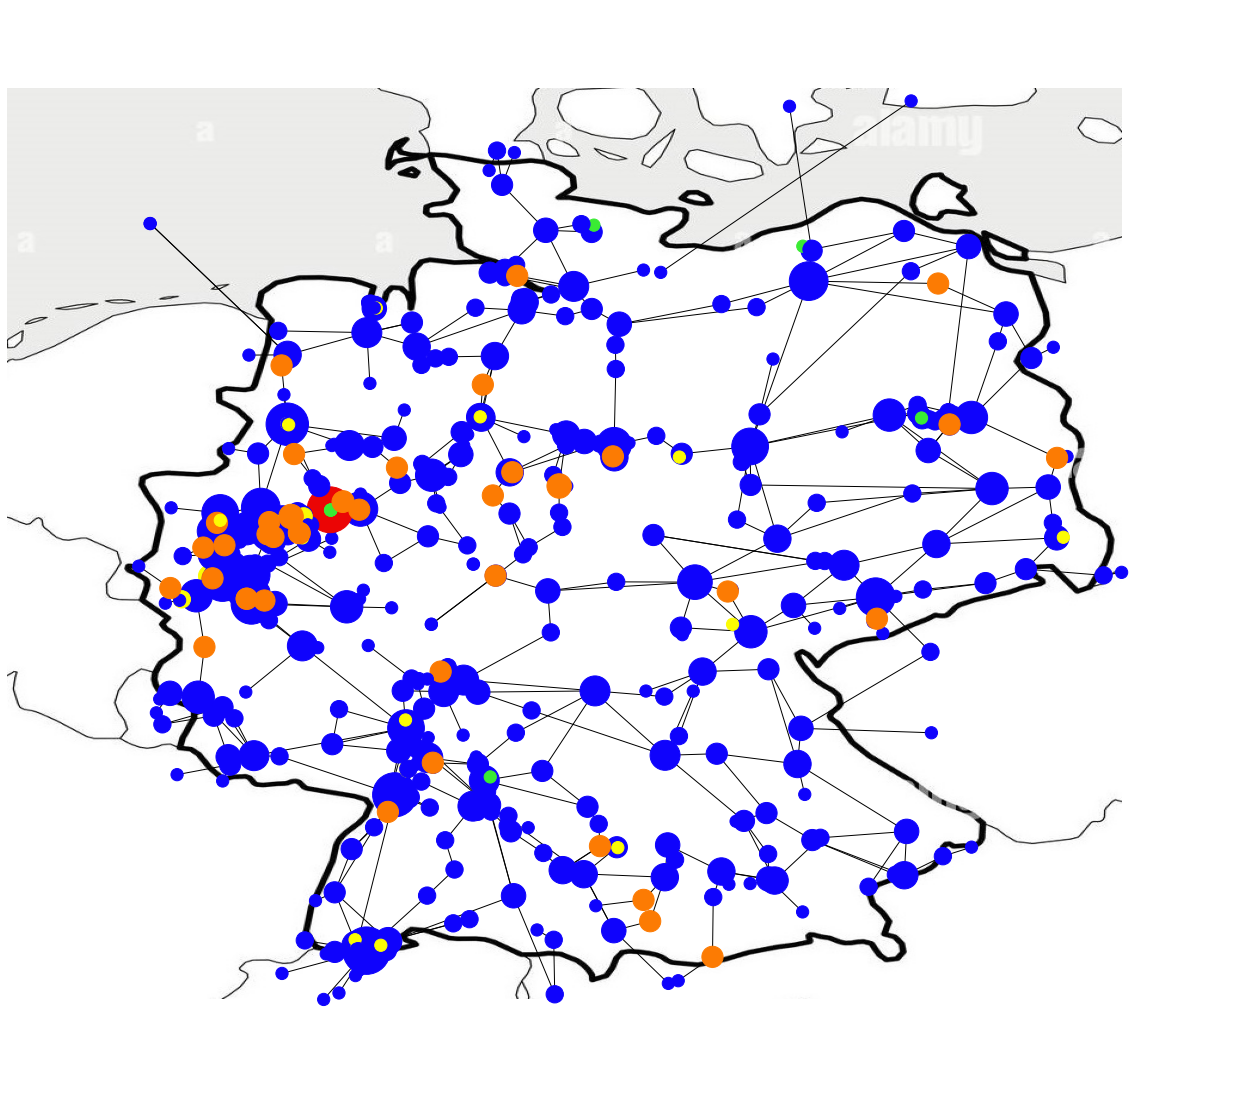

In [7]:
degs=[]
nodesize=[]
for i,deg in nx.degree(G):
    degs.append(deg)
    nodesize.append(150*deg)
    
#color coding using station type as reference
#substation ==> blue
#plant ==> yellow
#generator ==> green
#auillarynode ==> orange
color=["#0f03fc"]*len(x)
for i in range(0,len(x),1):        
    if (type[i]==1):
        color[i]="#0f03fc"
    elif(type[i]==2):
        color[i]="#fcfc03"
    elif(type[i]==3):
        color[i]="#3aeb34"
    else:
        color[i]="#fc7b03"
        
for j in b:
    color[j]="#eb0505"
  

#Red : Corresponding nodes


plt.rcParams["figure.figsize"] = (70,20)
img = plt.imread("1.jpg")
fig, ax = plt.subplots()
ax.imshow(img, extent=[4.687555, 15.11496564,47.09422083,55.610345])


nx.draw(G,pos,node_color=color,node_size=nodesize)



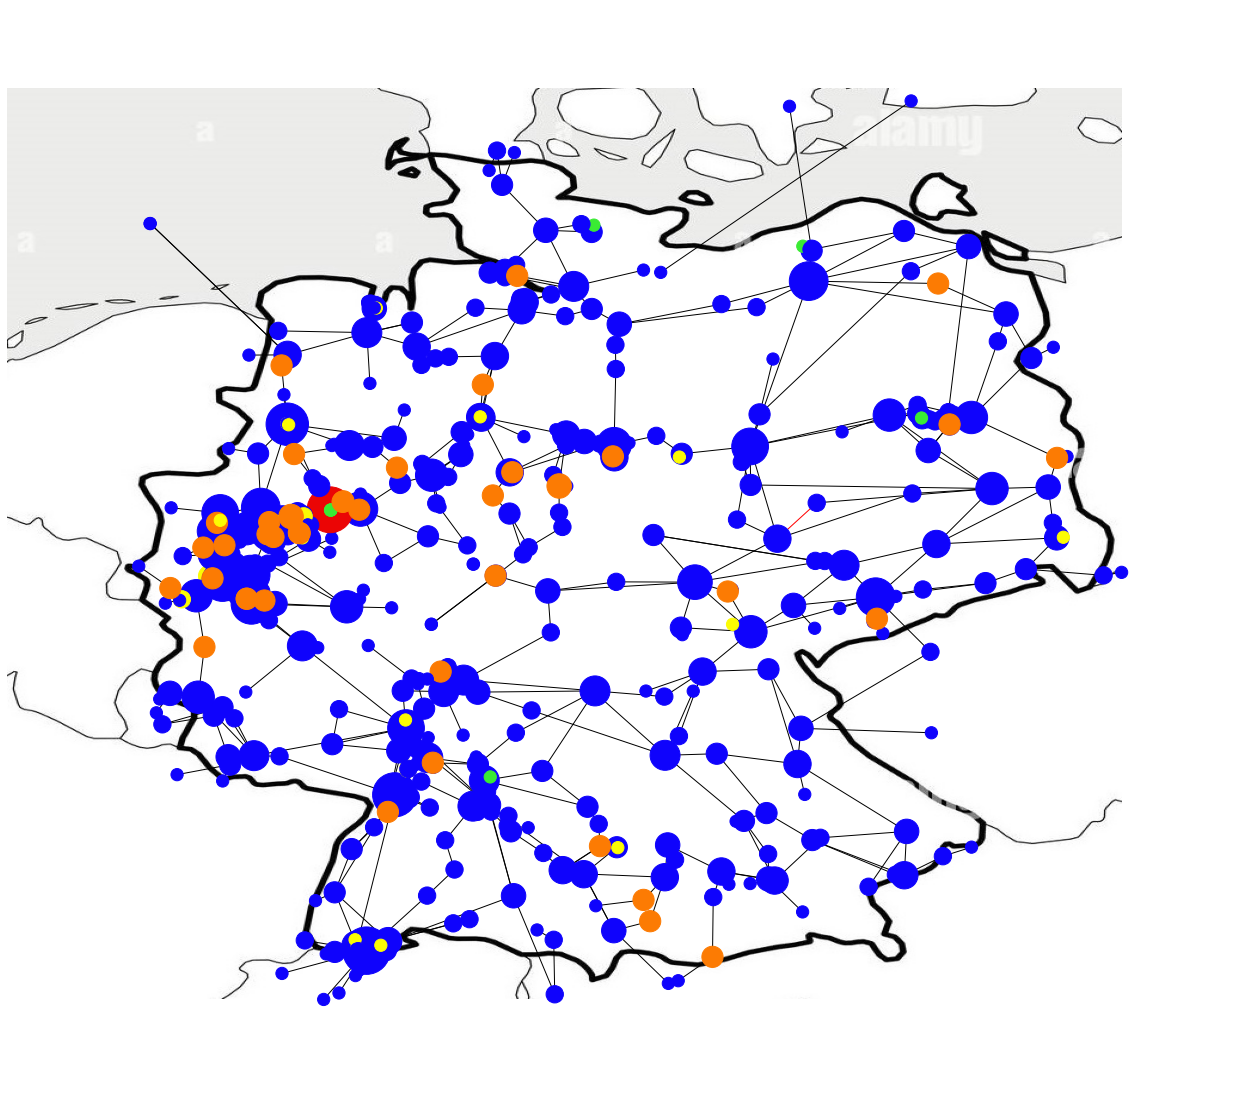

In [8]:
#Red links : affected link

plt.rcParams["figure.figsize"] = (70,20)
img = plt.imread("1.jpg")
fig, ax = plt.subplots()
ax.imshow(img, extent=[4.687555, 15.11496564,47.09422083,55.610345])


nx.draw(G,pos,node_color=color,edge_color=ecolor,node_size=nodesize)

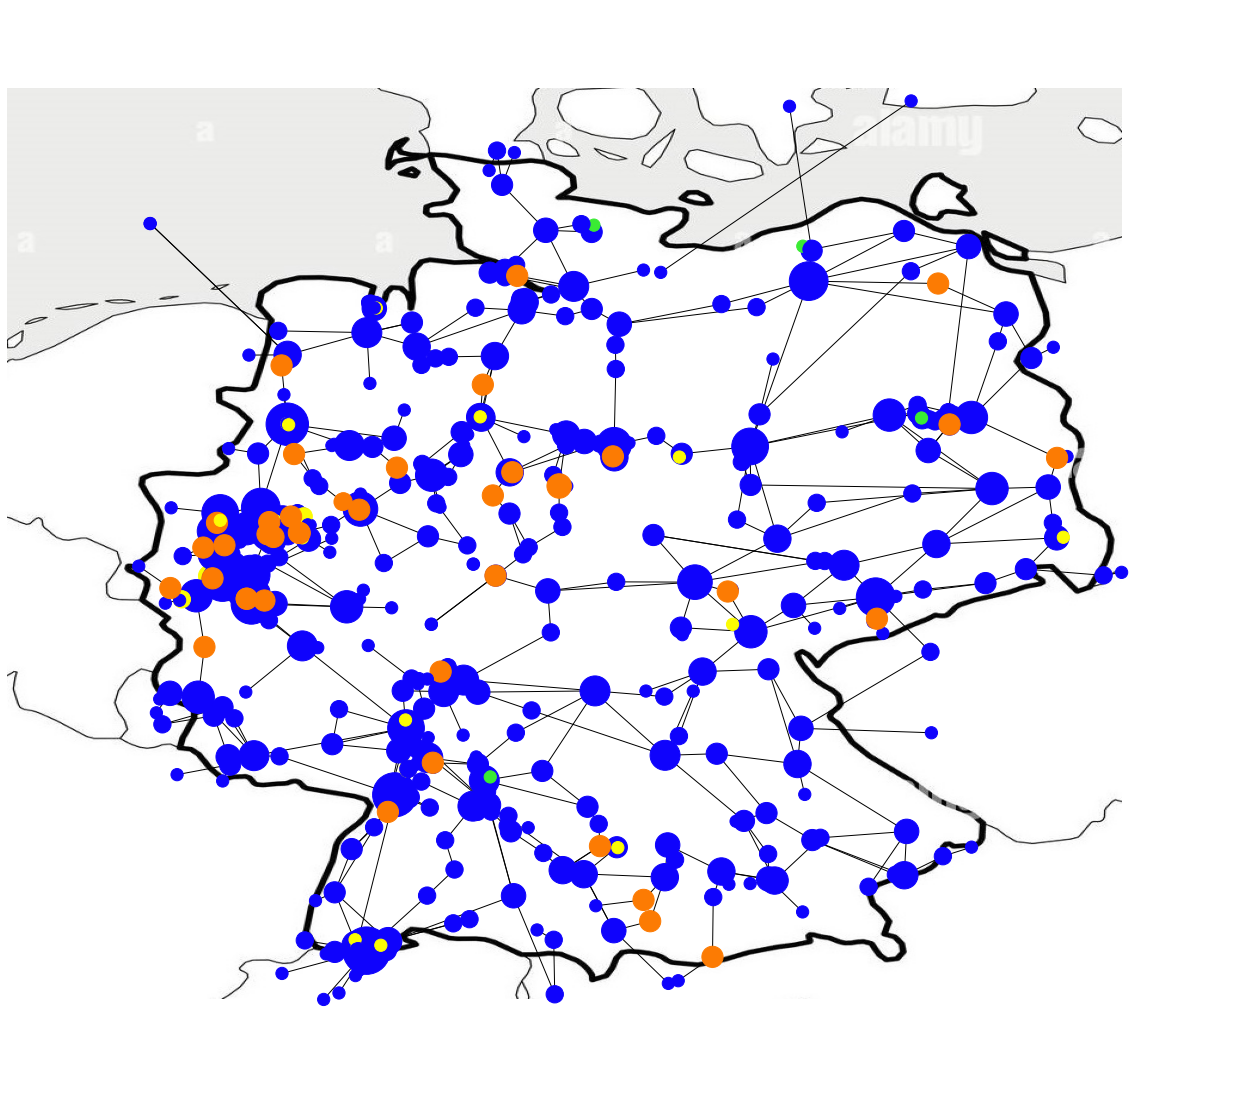

In [9]:
# flushing the arrays and importing fresh unhandled data again
v=[]
x=[]
y=[]
type=[]
p=[]
q=[]
cables=[]
wires=[]
pos=[]
color=[]

v,x,y,type = np.loadtxt('nodes.txt', unpack=True)
p,q,cables,wires = np.loadtxt('weight.txt', unpack=True)
 
a=[]
for i in range(0,len(p)):
    for j in attack_nodes:
        if p[i] == j:
            a.append(i)
        elif q[i] == j:
            a.append(i)

for i in a:
    p=np.delete(p,i-a.index(i))
    q=np.delete(q,i-a.index(i))
    cables=np.delete(cables,i-a.index(i))
    wires=np.delete(wires,i-a.index(i))
    
a=[]
for i in range(0,len(p)):
    for j in attack_nodes:
        if p[i] == j:
            a.append(i)
        elif q[i] == j:
            a.append(i)
for i in a:
    p=np.delete(p,i-a.index(i))
    q=np.delete(q,i-a.index(i))
    cables=np.delete(cables,i-a.index(i))
    wires=np.delete(wires,i-a.index(i))

#adding nodes
G=nx.Graph()
count=0        
for i in range(0,len(x),1):

    G.add_node(v[i],pos=(x[i],y[i]))
    
pos=nx.get_node_attributes(G,'pos')

#adding links with weights (weight assumptions, cables=1 ,wires=0.2)
weight_edge = []
count = 0
for i in range(0,len(cables),1):
    
    weight_edge.append(math.ceil(1+cables[i]+(0.2*wires[i])))
    G.add_edge(p[i],q[i],weight=weight_edge[i])

degs=[]
nodesize=[]
for i,deg in nx.degree(G):
    degs.append(deg)
    nodesize.append(150*deg)

#color coding using station type as reference
#substation ==> blue
#plant ==> yellow
#generator ==> green
#auillarynode ==> orange
color=["#0f03fc"]*len(x)
for i in range(0,len(x),1):        
    if (type[i]==1):
        color[i]="#0f03fc"
    elif(type[i]==2):
        color[i]="#fcfc03"
    elif(type[i]==3):
        color[i]="#3aeb34"
    else:
        color[i]="#fc7b03"
        
plt.rcParams["figure.figsize"] = (70,20)
img = plt.imread("1.jpg")
fig, ax = plt.subplots()
ax.imshow(img, extent=[4.687555, 15.11496564,47.09422083,55.610345])


nx.draw(G,pos,node_color=color,node_size=nodesize)

In [10]:
print("Number of Edges:"+str(int(len(G.edges()))))
print("Number of Nodes attacked:"+str(int(len(attack_nodes)))+" out of 511")
print("\nPercentage Damage:"+str(100-(len(G.edges)*100/679)))

Number of Edges:665
Number of Nodes attacked:2 out of 511

Percentage Damage:2.0618556701030997
